# Introduction

* The dataset that is being presented contains statistics on the loans that Chinese banks have made to various industries worldwide.
* Data visualisation will be used to attempt to deduce conclusions from the provided data.

# Importing necessary libraries

In [1]:
import pandas as pd #data processing, CSV files
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.express as px

# Loading the dataset

In [4]:
china_data = pd.read_csv("china_dept_trap.csv")

In [5]:
#Displaying the top 5 rows
china_data.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [6]:
#Displaying the bottom 5 rows
china_data.tail()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
853,Zalingei-El Geneinah Road Construction,2009,$120M,ExImBank,Government,Transport,None Known,Sudan
854,Zanzibar Airport Terminal 2 Expansion,2010,$73M,ExImBank,Government,Transport,None Known,Tanzania
855,Zemun-Borca bridge,2009,$217M,ExImBank,Government,Transport,None Known,Serbia
856,Zongo II Hydropower Station,2011,$367M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"
857,Zungeru Hydropower Plant Project,2013,$984M,ExImBank,Government,Power,Within Indigenous Peoples' Lands,Nigeria


* The provided data is organised into 8 columns and pertains to 858 loans.
* The year the loan was obtained is indicated in the "YEAR" column.
* The loan amount, in millions or billions, is listed in the "AMOUNT" column.
* The Chinese bank that provided the loan is identified in the "LENDER" column.
* The "BORROWER" column lists the borrower, which may be either the government or a private business.
* The sector for which the loan was obtained is indicated in the "SECTOR" column.
* The country that has accepted the loan is identified in the "COUNTRY" column.
* We need to study the "Expand All | Collapse All" and "SENSITIVE TERRITORY OVERLAP" columns carefully.

# Exploratory Data Analysis

In [8]:
#Count the number of rows and columns
china_data.shape

(858, 8)

The dataset has 858 rows and 8 columns.

In [9]:
#Displaying the column heading
china_data.columns

Index(['Expand All | Collapse All', 'YEAR', 'AMOUNT', 'LENDER', 'BORROWER',
       'SECTOR', 'SENSITIVE TERRITORY OVERLAP', 'Country'],
      dtype='object')

The names of all the columns have been displayed and the data type of all the column names is 'Object'.

In [10]:
#Displaying the information
china_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Expand All | Collapse All    858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


* YEAR column has numerical data
* Except 'YEAR' column all other columns have text data.

In [11]:
#State the summary
china_data.describe()

,YEAR
count,858.000000
mean,2013.268065
std,2.894155
min,2008.000000
25%,2011.000000
50%,2013.000000
75%,2016.000000
max,2019.000000


The statistical summary of 'YEAR' column has been displayed since it is the only numerical column in the dataset.

In [12]:
#Checking the null values
china_data.isnull().sum()

Expand All | Collapse All      0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

There is one null value present in the 'BORROWER' column. We need to drop the entire row consisting of the null value.

In [13]:
#Dropping the null values
china_data.dropna(inplace = True)

We have dropped the row where there was null value in 'BORROWER' column. The data is free from null values. Now there are 857 rows and 8 columns.

In [14]:
#Modifying the index of dataframe
china_data.index = np.arange(857)
china_data

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
...,...,...,...,...,...,...,...,...
852,Zalingei-El Geneinah Road Construction,2009,$120M,ExImBank,Government,Transport,None Known,Sudan
853,Zanzibar Airport Terminal 2 Expansion,2010,$73M,ExImBank,Government,Transport,None Known,Tanzania
854,Zemun-Borca bridge,2009,$217M,ExImBank,Government,Transport,None Known,Serbia
855,Zongo II Hydropower Station,2011,$367M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"


We have modified the index of our dataframe by assigning a array of serial numbers to it.

# Data Preprocessing

In [15]:
china_data['AMOUNT']

0       $50M
1      $7.0B
2       $47M
3      $475M
4      $600M
       ...  
852    $120M
853     $73M
854    $217M
855    $367M
856    $984M
Name: AMOUNT, Length: 857, dtype: object

* The "AMOUNT" column has only strings for values.
* All of the values must be transformed into numbers so that we may plot them and make conclusions.
* To extract individual values from the column "AMOUNT," we must repeatedly iterate over the column.
* Now that we have these values, we must endeavour to convert them all to numerical forms.

In [16]:
def amount(a):
    y=a
    if ',' in a:
        a=a.replace(',','')
    a=float(a[1:-1])
    if y[-1]=='M':
        return a*1000000
    elif y[-1]=='B':
        return a*1000000000
    else:
        return 'Please check'

In [17]:
china_data['AMOUNT']=china_data['AMOUNT'].apply(amount)

In [18]:
china_data.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,5.000000e+07,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7.000000e+09,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,4.700000e+07,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,4.750000e+08,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,6.000000e+08,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [19]:
type(china_data['AMOUNT'][1])

numpy.float64

The values are replaced and now the data type of values is numerical.

In [20]:
len(china_data['Expand All | Collapse All'].unique())

827

* As we've seen, the dataframe is 827 bytes long and has 827 distinct values for "Expand All | Collapse All."
* Thus, we cannot use this functionality.
* We must drop it.

In [21]:
china_data.drop('Expand All | Collapse All', axis = 1, inplace = True)
china_data

,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,2011,5.000000e+07,CDB,Government,Transport,None Known,Angola
1,2009,7.000000e+09,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,2012,4.700000e+07,ExImBank,Government,Government,None Known,Suriname
3,2009,4.750000e+08,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,2016,6.000000e+08,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya
...,...,...,...,...,...,...,...
852,2009,1.200000e+08,ExImBank,Government,Transport,None Known,Sudan
853,2010,7.300000e+07,ExImBank,Government,Transport,None Known,Tanzania
854,2009,2.170000e+08,ExImBank,Government,Transport,None Known,Serbia
855,2011,3.670000e+08,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"


In [23]:
china_data['SECTOR'].unique()

array(['Transport', 'Extraction, pipelines', 'Government', 'Power',
       'Mulit-sector/discretionary', 'Telecom', 'Other construction',
       'Agriculture, food', 'Manufacturing', 'fTransport'], dtype=object)

In [25]:
china_data['SECTOR'].value_counts()

Transport                     316
Power                         203
Government                    138
Telecom                        63
Extraction, pipelines          38
Mulit-sector/discretionary     30
Other construction             29
Agriculture, food              27
Manufacturing                  12
fTransport                      1
Name: SECTOR, dtype: int64

* fTransport in this case just has one value. So that value may be added to Transport.
* We may also change Agriculture, Food to "Agriculture and Food" and "Extraction, Pipelines" to "extraction and pipelines."
* It is possible to rename "multi-sector/discretionary" to "multi-sector and discretionary."

In [26]:
china_data['SECTOR'] = china_data['SECTOR'].str.replace('fTransport','Transport')
china_data['SECTOR'] = china_data['SECTOR'].str.replace('Extraction, pipelines','Extraction and Pipelines')
china_data['SECTOR'] = china_data['SECTOR'].str.replace('Agriculture, food','Agricultiure and Food')
china_data['SECTOR'] = china_data['SECTOR'].str.replace('/discretionary',' and discretionary')

In [27]:
china_data['SECTOR'].value_counts()

Transport                         317
Power                             203
Government                        138
Telecom                            63
Extraction and Pipelines           38
Mulit-sector and discretionary     30
Other construction                 29
Agricultiure and Food              27
Manufacturing                      12
Name: SECTOR, dtype: int64

* Now the 'SECTOR' column is readable and can be plotted in graphs.
* Our next step is to change the 'LENDER' column.
* For that we need to check the unique values and value counts.

In [28]:
#Displaying the unique variables of the column 'LENDER'
china_data['LENDER'].unique()

array(['CDB', 'ExImBank', 'CDB, ExImBank', 'BOC, CDB, ExImBank',
       'CDB, ICBC', 'CDB, others', 'CDB, Citic'], dtype=object)

In [29]:
#Count the number of observations in each unique value of the column 'LENDER' 
china_data['LENDER'].value_counts()

ExImBank              625
CDB                   219
CDB, ExImBank           8
CDB, ICBC               2
CDB, others             1
CDB, Citic              1
BOC, CDB, ExImBank      1
Name: LENDER, dtype: int64

* There are seven distinct values, as we have seen.
* We can observe that "CDB" and "ExImBank" are the first and second unique values, respectively.
* The third unique number, "CDB, ExImBank," which combines the first two unique values, denotes that CDB and ExImBank have partnered to make a loan.
* The same situation is continuing.
* Make lists in the "LENDER" columns so that MultiLabelBinarizer can be applied to them.

In [30]:
#Correcting the variable's names
x = []
for i in china_data['LENDER'].unique():
    x+=[j for j in i.split(', ')  if j not in x]
    
x

['CDB', 'ExImBank', 'BOC', 'ICBC', 'others', 'Citic']

In [31]:
china_data[x] = 0

In [32]:
for i,j in enumerate(china_data['LENDER']):
    for g in j.split(', '):
        china_data[g][i] = 1
        
china_data.head(2)

,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country,CDB,ExImBank,BOC,ICBC,others,Citic
0,2011,5.000000e+07,CDB,Government,Transport,None Known,Angola,1,0,0,0,0,0
1,2009,7.000000e+09,CDB,Petrobras,Extraction and Pipelines,None Known,Brazil,1,0,0,0,0,0


In [34]:
z = china_data[['CDB','ExImBank','BOC','ICBC','others','Citic']].sum()
z

CDB         232
ExImBank    634
BOC           1
ICBC          2
others        1
Citic         1
dtype: int64

* Our next step is to change the 'SENSITIVE TERRITORY OVERLAP' column.
* For that we need to check the unique values and value counts.

In [35]:
#Displaying the unique variables of the column 'SENSITIVE TERRITORY OVERLAP'
china_data['SENSITIVE TERRITORY OVERLAP'].unique()

array(['None Known',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats",
       "Within Indigenous Peoples' Lands",
       "Within Indigenous Peoples' Lands\n Within National Protected Areas",
       'Within Critical Habitats\n Within National Protected Areas',
       'Within Critical Habitats',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas",
       'Within National Protected Areas'], dtype=object)

In [36]:
#Count the number of observations in each unique value of the column 'SENSITIVE TERRITORY OVERLAP' 
china_data['SENSITIVE TERRITORY OVERLAP'].value_counts()

None Known                                                                                       524
Within Critical Habitats                                                                         124
Within Critical Habitats\n Within National Protected Areas                                        57
Within Indigenous Peoples' Lands\n Within Critical Habitats                                       45
Within Indigenous Peoples' Lands                                                                  41
Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas     34
Within National Protected Areas                                                                   19
Within Indigenous Peoples' Lands\n Within National Protected Areas                                13
Name: SENSITIVE TERRITORY OVERLAP, dtype: int64

* Looking at the unique values, there are 8 unique values.
* But the 8 values are just combination of 4 values which are none, critical, indegenous and protected.
* There is significant overlapping of values.
* So we can create 3 new columns for these 3 unique values, so when the value is "Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas" there will be 1 in 3 columns expect ST_None.

In [37]:
l = []
for i in china_data['SENSITIVE TERRITORY OVERLAP'].unique():
    l+=[j for j in i.split('\n ')  if j not in l]
    
l

['None Known',
 "Within Indigenous Peoples' Lands",
 'Within Critical Habitats',
 'Within National Protected Areas']

In [38]:
china_data[['STO_Indigenous','STO_Critical','STO_Protected']] = 0

In [39]:
for i,j in enumerate(china_data['SENSITIVE TERRITORY OVERLAP']):
    for g in j.split('\n '):
        if  "Within Indigenous Peoples' Lands" in g:
            china_data['STO_Indigenous'][i] = 1 
            
        if  'Within Critical Habitats' in g:
            china_data['STO_Critical'][i] = 1 
            
        if  'Within National Protected Areas'  in g:
            china_data['STO_Protected'][i] = 1  

* When the value in 'Territory_overlap' column was 'Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas' then there should be 1 in 'ST_Critical', 'ST_Indegenous', and 'ST_National' columns for that particular row.
* This completes our preprocessing.
* Next we have to do visualisations and draw inferences from our data.

# Visualization and Inferences

* First, let us plot a histogram for the amount of loans taken. This will give us an idea for what amount of loans were taken the highest.
* We can plot histogram using seaborn library.

<AxesSubplot:xlabel='AMOUNT', ylabel='Count'>

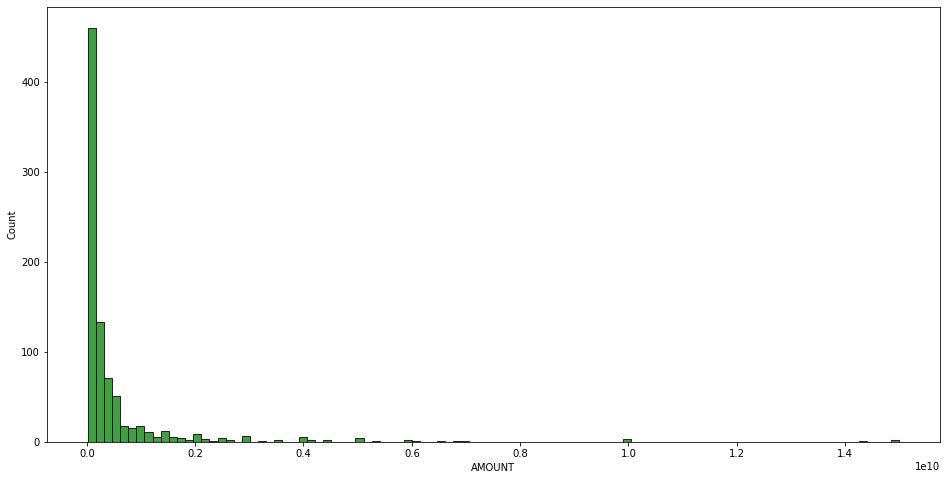

In [41]:
plt.figure(figsize = (16,8))
sns.histplot(data = china_data, x = 'AMOUNT', bins = 100, color = 'Green')

* We see most of the values are in the range of 0 Millions to 2000 Millions.
* From the above histogram we can say that the most number of loans were given for amounts upto 200 Millions.
* Now let us visualize how many loans were taken in which year. For this we can use countplot from the seaborn library.
* Next, let us see how much amount of loans were taken in any year.

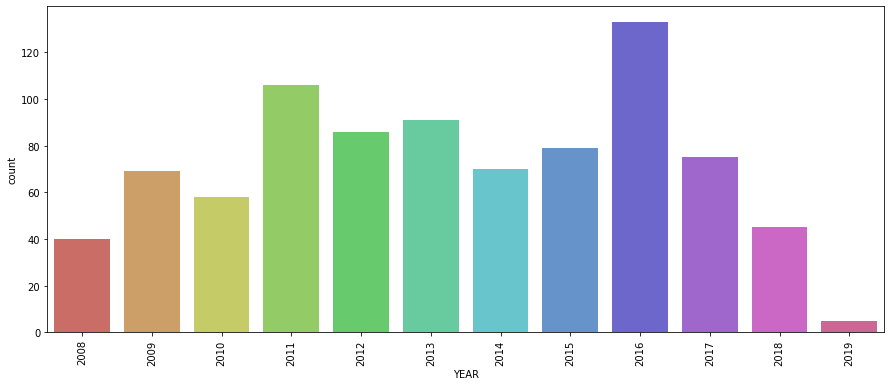

In [47]:
#Display the above in the form of a bar chart
plt.figure(figsize=(15,6))
sns.countplot('YEAR', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

* As we can see the most number of loans were taken in 2016 and the least number of loans were taken in 2019.
* We can calculate loans given out per year by using groupby and taking sum as the aggregate function.

In [48]:
loan_per_year = china_data[["YEAR", "AMOUNT"]].groupby("YEAR").sum()
loan_per_year

,AMOUNT
YEAR,
2008,7.565000e+09
2009,6.240000e+10
2010,4.123500e+10
2011,3.394900e+10
2012,3.488600e+10
2013,4.185200e+10
2014,4.839100e+10
2015,5.110400e+10
2016,7.500100e+10


* We can plot the data in loan_per_year dataset which we have created simply using .plot method taking the amount on the Y-Axis and sum on the corresponding year on the X-Axis.

<AxesSubplot:xlabel='YEAR'>

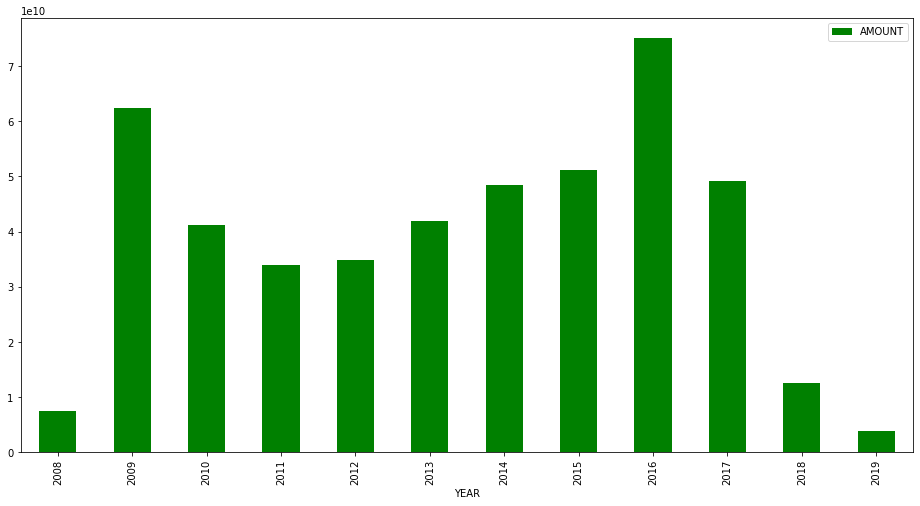

In [49]:
loan_per_year.plot(kind = 'bar', color = 'Green',figsize = (16,8))

* The overall number of loans granted in 2016 topped 70 billion, which was the biggest sum ever.
* According to the graph we displayed above, only about 70 loans were made in 2009, yet the total amount of loans made topped 60 billion dollars.
* Let's do visualisations and draw conclusions for nations now that the visualisations for a year are complete.
* We must utilise groupby and group with regard to nations for that. Let's create two aggregate functions, one for the total amount of loans and one for the total number of loans.

In [50]:
loan_country = china_data[['Country','AMOUNT']].groupby('Country').agg({'AMOUNT':'sum', 'Country':'count'})
loan_country.head()

,AMOUNT,Country
Country,,
Angola,2.964000e+10,115
Antigua & Barbuda,1.280000e+08,2
Argentina,1.708300e+10,11
Bahamas,9.900000e+07,2
Bangladesh,1.108900e+10,17


* There are two columns with the term "Country," one of which is the index column and the other of which is the total number of loans taken.
* Let's give the column for counts a new name.

In [51]:
loan_country.rename(columns = {'Country': 'Count'}, inplace = True)
loan_country.sort_values('Count', ascending = False).head(5)

,AMOUNT,Count
Country,,
Angola,2.964000e+10,115
Ethiopia,8.291000e+09,34
Cambodia,5.008000e+09,31
Sri Lanka,8.709000e+09,30
Indonesia,1.449900e+10,30


* When we sort the values in loan_country dataset according to the count, we can see that Angola has taken the highest number of loans which is 115, followed by Ethiopia which has taken 34.

In [52]:
loan_country.sort_values('AMOUNT', ascending = False).head(5)

,AMOUNT,Count
Country,,
Venezuela,5.769100e+10,16
Pakistan,3.985300e+10,23
Russian Federation,3.704500e+10,8
Angola,2.964000e+10,115
Brazil,2.815600e+10,10


* When the variables in the loan country dataset are sorted by the amount of loans taken, Venezuela comes out on top since it has borrowed the most money from China, totaling 57 billion dollars.
* When values are sorted by the amount of loans taken, Angola has taken the most loans—115—but the total amount of those loans—29 billion dollars—places them fourth overall.
* Let's draw graphs for the number of loans and the total amount borrowed.

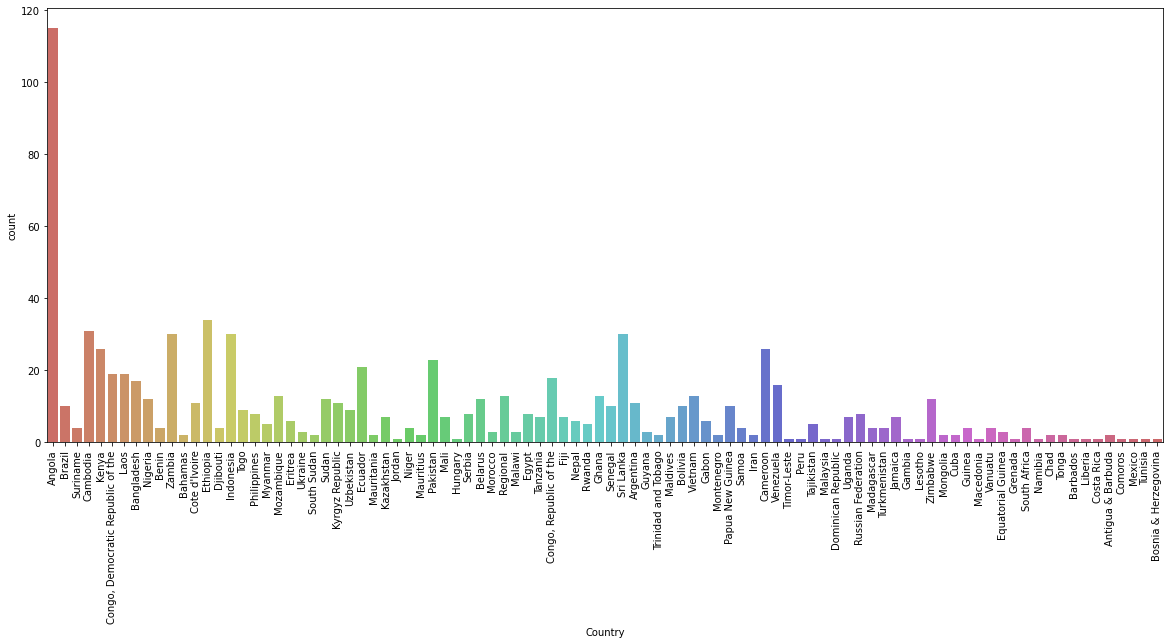

In [53]:
#Display the above in the form of a bar chart
plt.figure(figsize=(20,8))
sns.countplot('Country', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

* With the.countplot function, we created a horzintal bar graph.
* We sorted the numbers according to the total count of loans taken before producing the graph.
* We may infer from the graph that Angola has borrowed the most number of loans.

<AxesSubplot:ylabel='Country'>

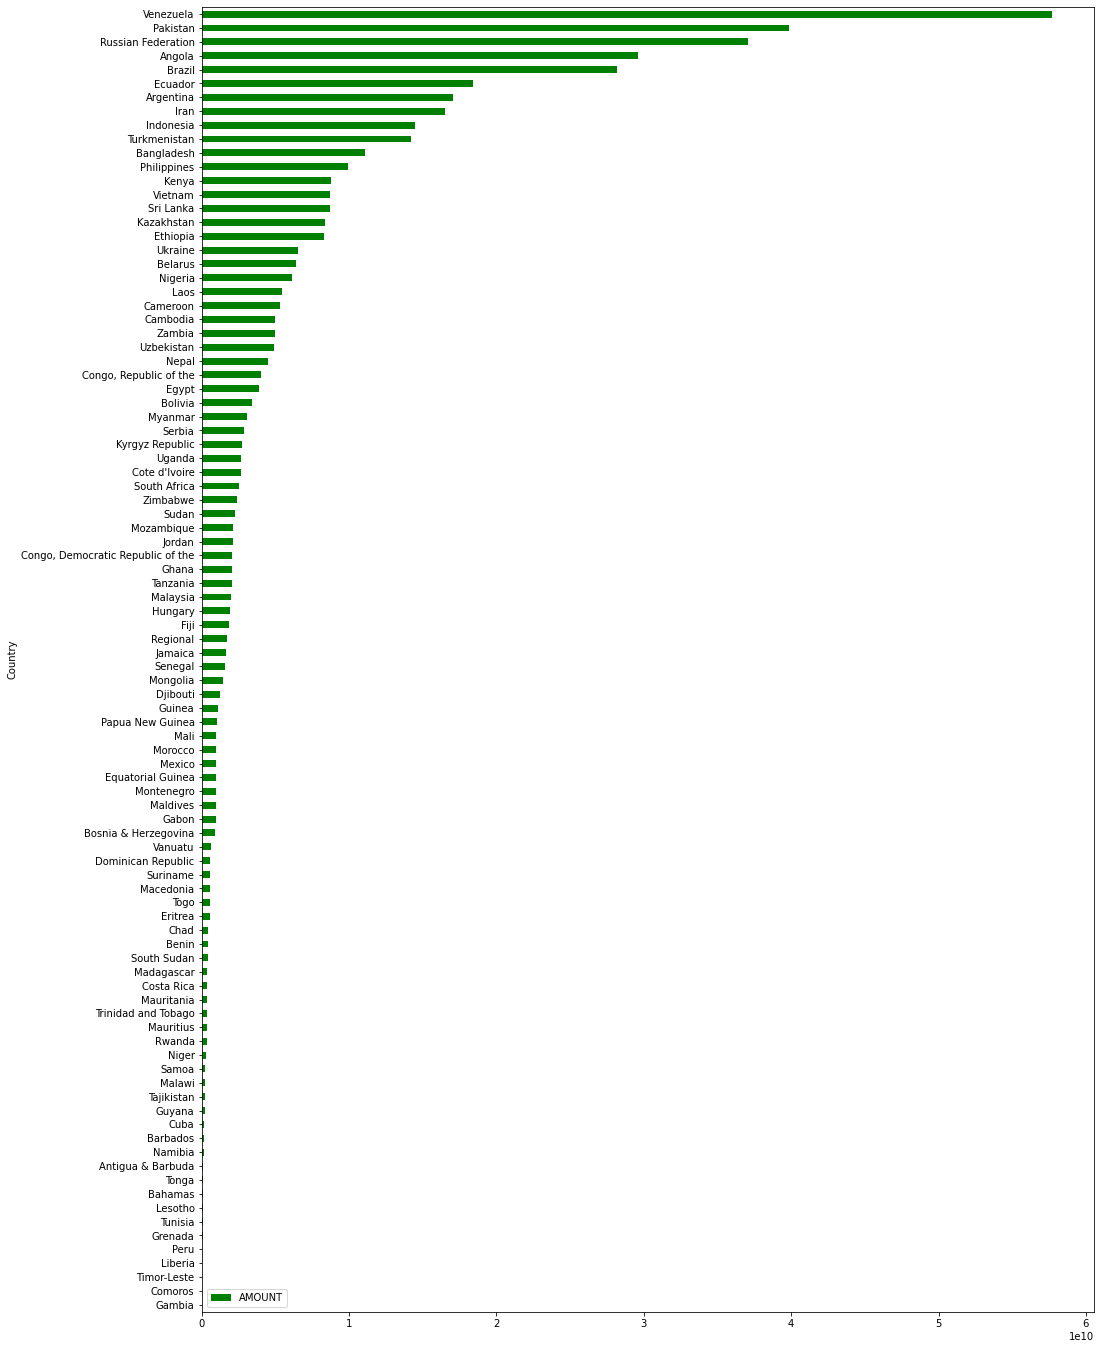

In [54]:
loan_country.sort_values('AMOUNT', ascending = True).plot(y = 'AMOUNT', kind = 'barh', figsize = (16,24), color = 'Green')

* We plotted a horzintal bar graph using the .plot function.
* Before plotting the graph we sorted the values according to the sum of amount of loans taken.
* From the graph we can conclude that Venezuela has taken the highest sum of loans, followed by Pakistan, Russian Federation, Angola and Brazil in that order.

<AxesSubplot:>

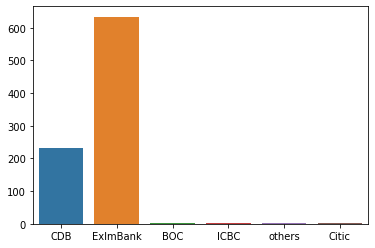

In [55]:
sns.barplot(x = z.index, y = z.values)

The 'LENDER' column after splitting has been plotted and we can see that ExImBank has given maximum number of loans.

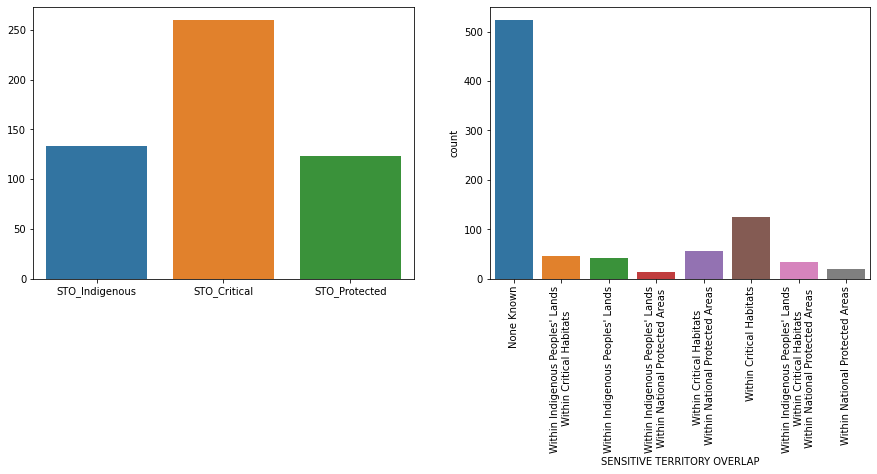

In [56]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x = ['STO_Indigenous','STO_Critical','STO_Protected'] ,y =china_data[['STO_Indigenous','STO_Critical','STO_Protected']].sum())

plt.subplot(1,2,2)
sns.countplot(x = 'SENSITIVE TERRITORY OVERLAP',data = china_data)
plt.xticks(rotation = 90)

plt.show()

* When we display the graph for quantities, we can see that the transportation industry has borrowed the most money throughout the years, followed by the pipeline and extraction industries and the power sector.
* When we look at the total amount borrowed, we can see that the power industry ranks third despite having taken the third most loans.
* While the extraction and pipelines industry has taken on less loans, the total amount borrowed is still substantial.
* The number of loans taken out by the telecom industry is high, but the total amount borrowed over time is modest.

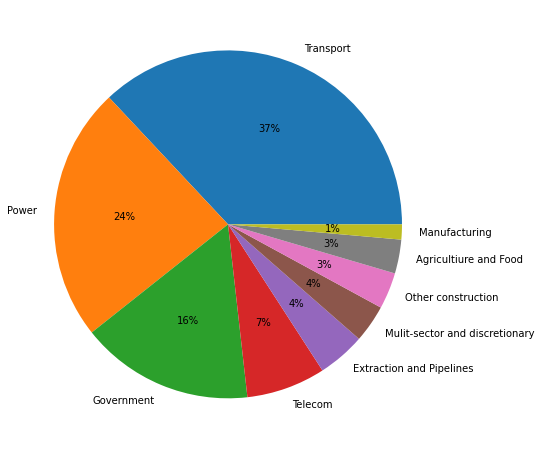

In [58]:
a = china_data['SECTOR'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(x = a, data = china_data, labels= a.index,autopct='%.0f%%')
plt.show()

* We can see from the pie graphic that the transportation industry received the most loans, accounting for 37% of all loans.
* The electricity industry and the government sector come in second and third, respectively, with major contributions of 24% and 16%.
* Compared to the top 3, less loans have been taken out by other industries.

In [59]:
loan_per_sector = china_data[["SECTOR", "AMOUNT"]].groupby("SECTOR").agg({'AMOUNT':'sum', 'SECTOR':'count'})
loan_per_sector

,AMOUNT,SECTOR
SECTOR,,
Agricultiure and Food,7.526000e+09,27
Extraction and Pipelines,1.141870e+11,38
Government,2.312000e+10,138
Manufacturing,8.747000e+09,12
Mulit-sector and discretionary,5.915600e+10,30
Other construction,2.261300e+10,29
Power,9.853400e+10,203
Telecom,8.061000e+09,63
Transport,1.202030e+11,317


* There are two columns titled "country," one of which is the index column and the other, "Sector," provides the total number of loans obtained.
* Let's give the column for counts a new name.

In [61]:
loan_per_sector.rename(columns = {'SECTOR':'Count'}, inplace = True)
loan_per_sector.sort_values('Count', ascending = False)

,AMOUNT,Count
SECTOR,,
Transport,1.202030e+11,317
Power,9.853400e+10,203
Government,2.312000e+10,138
Telecom,8.061000e+09,63
Extraction and Pipelines,1.141870e+11,38
Mulit-sector and discretionary,5.915600e+10,30
Other construction,2.261300e+10,29
Agricultiure and Food,7.526000e+09,27
Manufacturing,8.747000e+09,12


* When we group variables according to count, we can see that the Transport Sector received 317 loans, which is the majority of all recipients.
* The next two sectors with a significant loan volume are power and government.
* According to the data, China grants less loans for the manufacturing sector.

In [63]:
loan_per_sector.sort_values('AMOUNT', ascending = False)

,AMOUNT,Count
SECTOR,,
Transport,1.202030e+11,317
Extraction and Pipelines,1.141870e+11,38
Power,9.853400e+10,203
Mulit-sector and discretionary,5.915600e+10,30
Government,2.312000e+10,138
Other construction,2.261300e+10,29
Manufacturing,8.747000e+09,12
Telecom,8.061000e+09,63
Agricultiure and Food,7.526000e+09,27


* When we sort values according to the Amount we can see that Trasport sector has got the most amount of loans, which is fair because they also have the most number of loans.
* Extraction and Pipelines sector has got the second highest sum of loans despite getting only 38 loans in number.
* Let us visualise this data by plotting it.

<AxesSubplot:xlabel='SECTOR'>

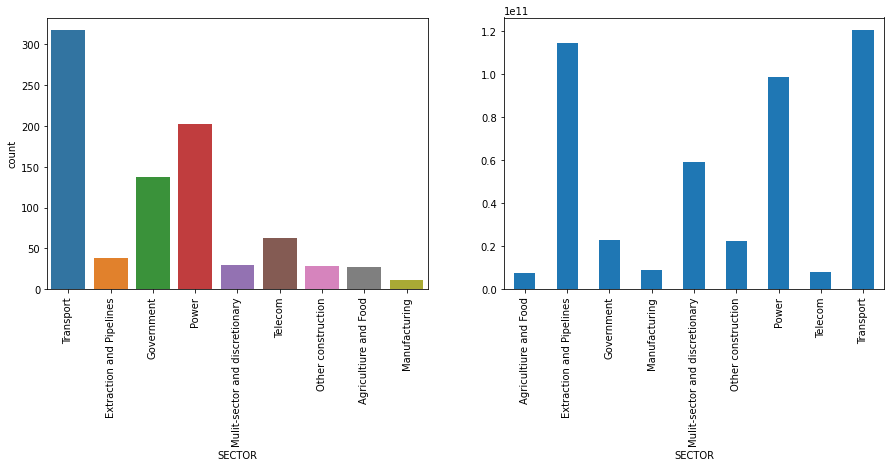

In [64]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot('SECTOR',data = china_data)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
china_data.groupby('SECTOR')['AMOUNT'].sum().plot.bar()

* By plotting graph for the data, we can visualize that Transport sector has taken high number of loans, followed by Power Sector.
* Discretionary, construction, agriculture and manufacturing Sectors have taken less number of loans.
* When we display the graph for quantities, we can see that the transportation industry has borrowed the most money throughout the years, followed by the pipeline and extraction industries and the power sector.
* When we look at the total amount borrowed, we can see that the power industry ranks third despite having taken the third most loans.
* While the extraction and pipelines industry has taken on less loans, the total amount borrowed is still substantial.
* The quantity of loans taken out by the telecom industry is significant, but the total amount borrowed over time is modest.
* The following concern is which nation has borrowed the most money for a specific industry.
* Using groupby, we may discover that.

In [65]:
loan_country_sector = china_data[['Country','SECTOR','AMOUNT']].groupby(['Country', 'SECTOR']).sum('AMOUNT')
loan_country_sector

AMOUNT
Country  SECTOR                                      
Angola   Agricultiure and Food           8.930000e+08
         Extraction and Pipelines        1.750000e+10
         Government                      1.311000e+09
         Manufacturing                   8.300000e+07
         Mulit-sector and discretionary  2.200000e+09
...                                               ...
Zambia   Transport                       2.476000e+09
Zimbabwe Government                      3.410000e+08
         Power                           1.318000e+09
         Telecom                         4.370000e+08
         Transport                       3.160000e+08

[273 rows x 1 columns]

In [66]:
loan_country_sector[['AMOUNT']].sort_values('AMOUNT', ascending = False).head(10)

,,AMOUNT
Country,SECTOR,
Venezuela,Mulit-sector and discretionary,4.050000e+10
Russian Federation,Extraction and Pipelines,2.750000e+10
Brazil,Extraction and Pipelines,2.500000e+10
Pakistan,Power,1.840600e+10
Angola,Extraction and Pipelines,1.750000e+10
Pakistan,Transport,1.680300e+10
Venezuela,Extraction and Pipelines,1.520000e+10
Iran,Other construction,1.500000e+10
Turkmenistan,Extraction and Pipelines,1.420000e+10


* We may apply groupby to two columns, such as "Country" and "Sector," and then total the values in the aggregate.
* Now that we can sort in decreasing order, the highest debt taken will be displayed at the top.
* We can observe that Venezuela has accepted the largest loan in the multi-sector and discretionary categories, totaling more than 40 billion dollars, from the loan country sector.
* For the extraction and pipelines sector, the Russian Federation has borrowed a total of more than 27.5 billion dollars.
* The top 10 sums of loans by sector include the extraction and pipelines sector five times.

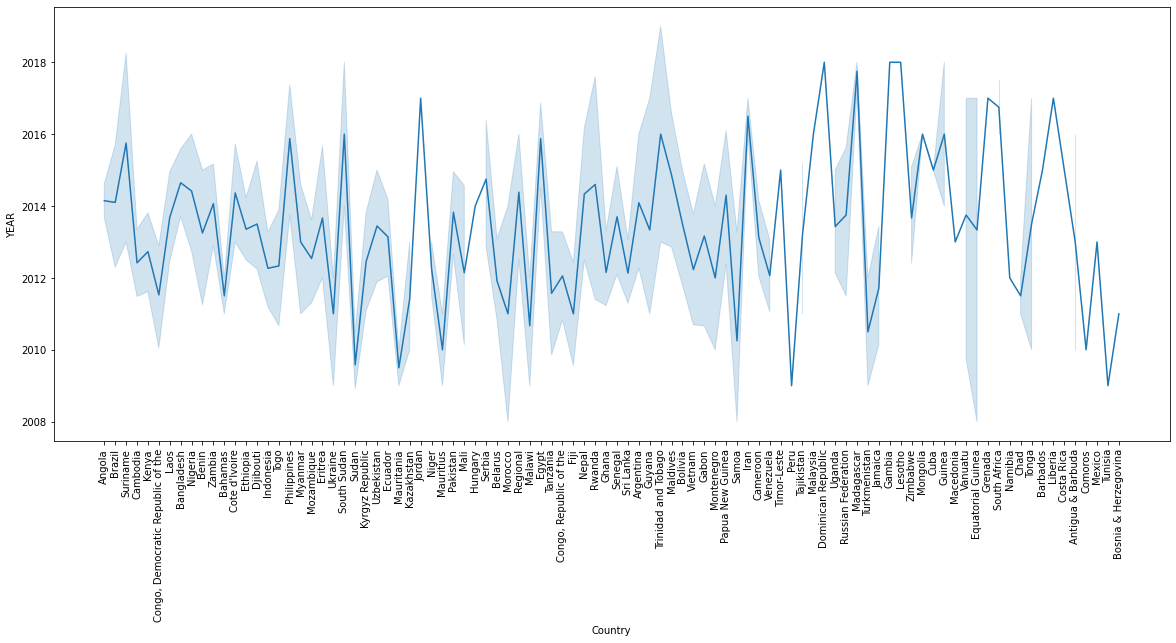

In [68]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'Country',y = 'YEAR', data = china_data)
plt.xticks(rotation = 90)
plt.show()

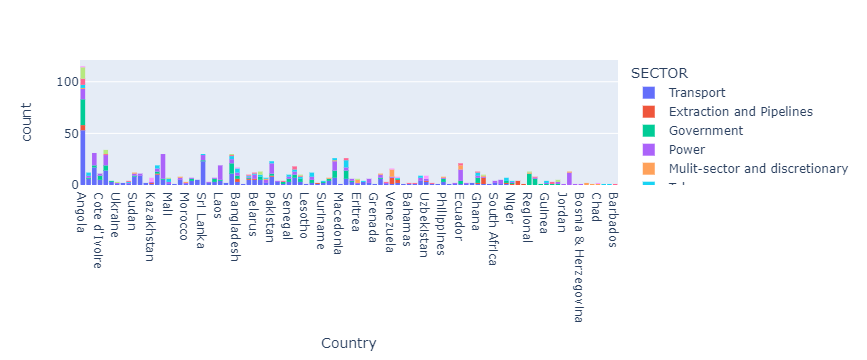

In [79]:
fig6 = px.histogram(china_data,x = "Country", color = "SECTOR")
fig6.show()

The above graph shows the total amount investede by different sectors in different sectors.

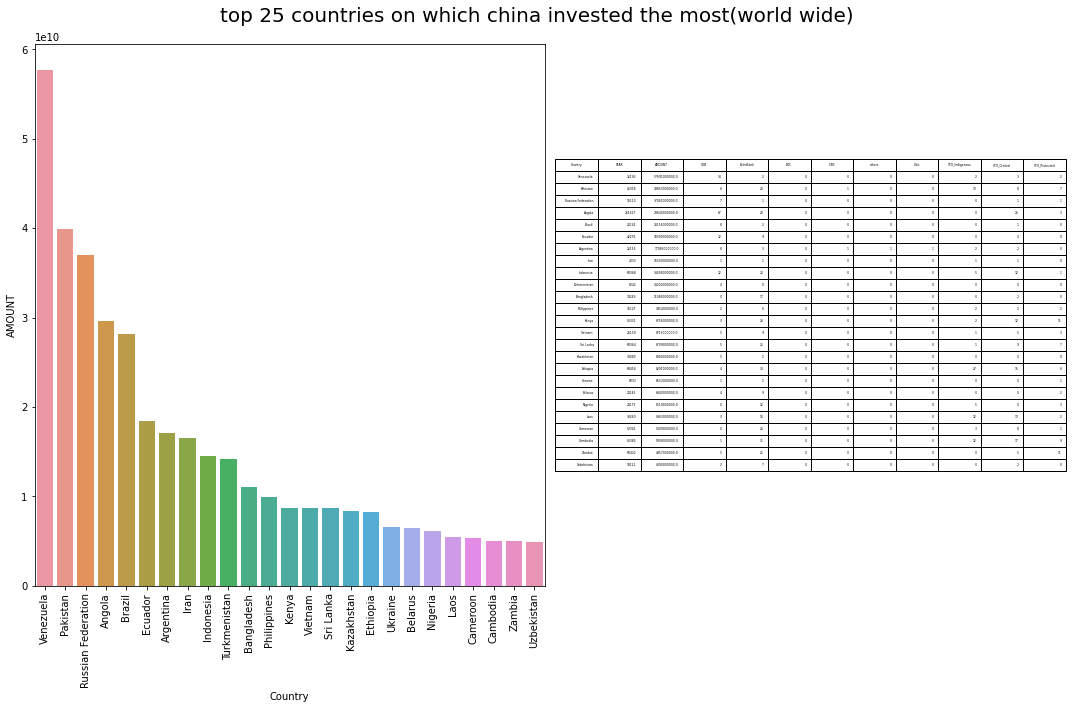

In [70]:
plt.figure(figsize=(15,10))
plt.suptitle('top 25 countries on which china invested the most(world wide)',size=20)
data=china_data.groupby('Country').sum().reset_index().sort_values('AMOUNT',ascending=False)
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=data.head(25),x='Country',y='AMOUNT')
plt.subplot(1,2,2)
plt.axis('off')
plt.tight_layout()
plt.table(cellText=data.head(25).values, colLabels=data.columns, loc='center')

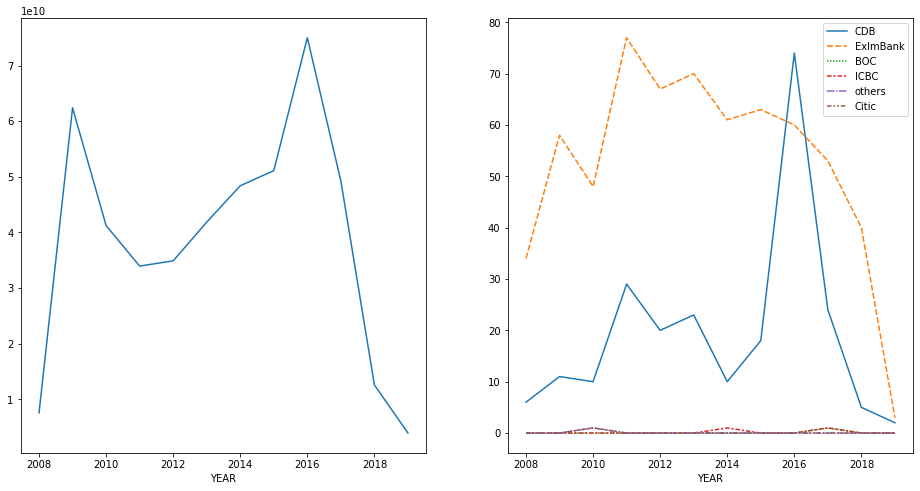

In [76]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
china_data.groupby('YEAR')['AMOUNT'].sum().plot.line()
plt.subplot(1,2,2)
y =china_data.groupby('YEAR')[['CDB','ExImBank','BOC','ICBC','others','Citic']].sum()

sns.lineplot(data=y )
# df.groupby('YEAR')[['CDB','ExImBank','BOC','ICBC','others','Citic']].sum().plot.line()

plt.show()

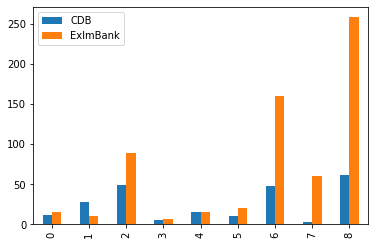

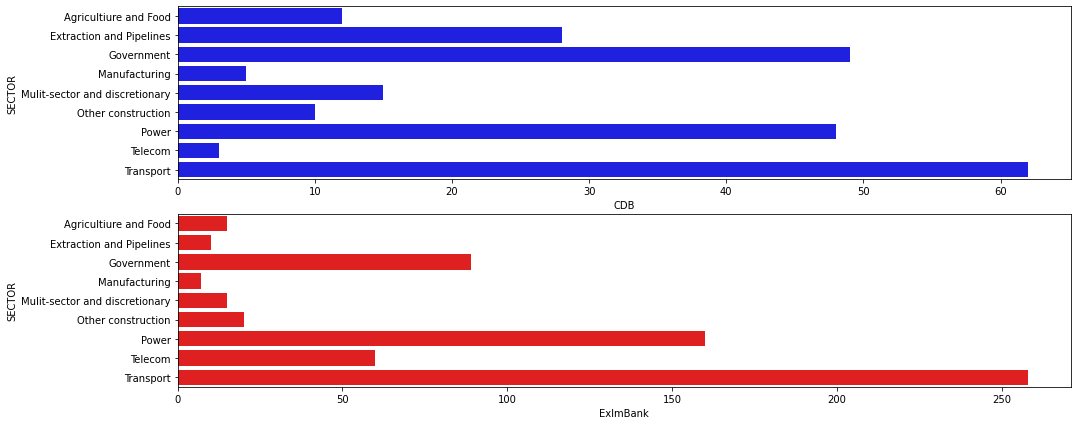

In [78]:
z =china_data.groupby('SECTOR')[['CDB','ExImBank']].sum().reset_index()
z.plot.bar()

zdf= pd.DataFrame(z)
zdf
plt.figure(figsize=(16,7))
# plotting columns
plt.subplot(2,1,1)
sns.barplot(y=zdf["SECTOR"], x=zdf["CDB"], color='b',orient='h')
plt.subplot(2,1,2)
sns.barplot(y=zdf["SECTOR"], x=zdf["ExImBank"], color='r',orient='h')
 
plt.show()

* The lenders 'CDB' and 'ExImBank' have been plotted separately sector wise.
* Transport is the sector in which both the lenders have invested more.